In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt 
 
# load the dataset 
dataset = sns.load_dataset('tips') 
 
print(dataset.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


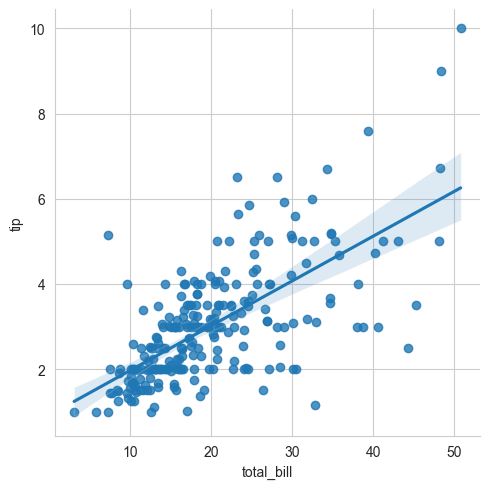

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 
 
# load the dataset 
dataset = sns.load_dataset('tips') 
 
# the for debugging 
#print(dataset.head()) 
sns.set_style('whitegrid') 
sns.lmplot(x='total_bill', y='tip', order=1, data=dataset) 
 
plt.show() 

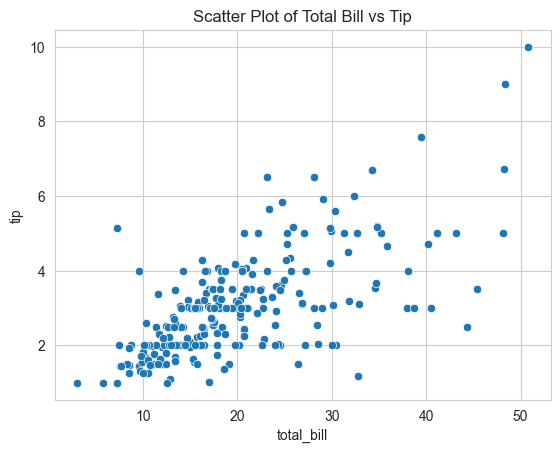

In [3]:
# scatter plot

sns.scatterplot(x='total_bill', y='tip', data=dataset)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()


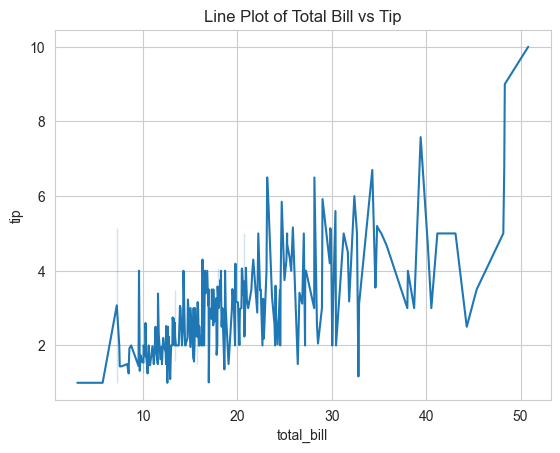

In [4]:
# line plot

sorted_data = dataset.sort_values('total_bill')
sns.lineplot(x='total_bill', y='tip', data=sorted_data)
plt.title('Line Plot of Total Bill vs Tip')
plt.show()


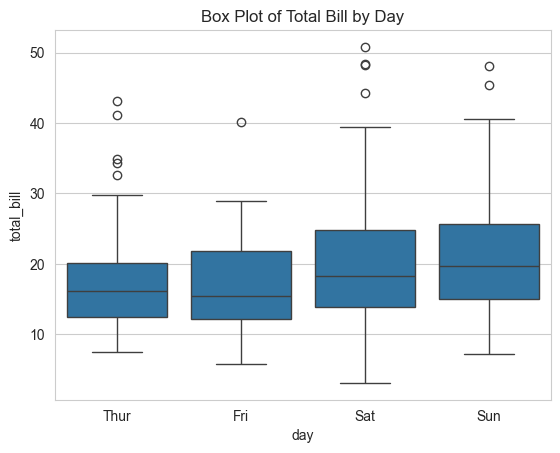

In [5]:
# box plot

sns.boxplot(x='day', y='total_bill', data=dataset)
plt.title('Box Plot of Total Bill by Day')
plt.show()


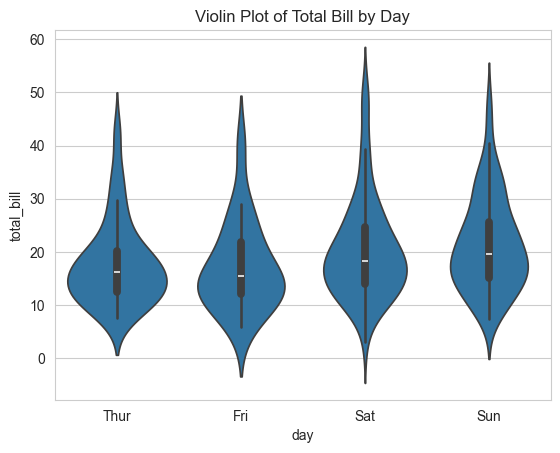

In [6]:
# violin plot

sns.violinplot(x='day', y='total_bill', data=dataset)
plt.title('Violin Plot of Total Bill by Day')
plt.show()


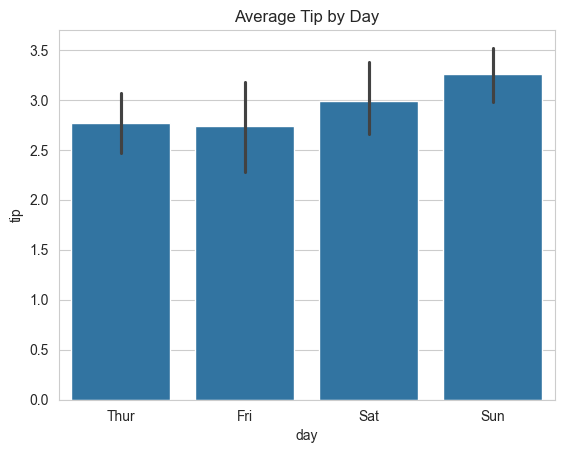

In [7]:
# bar plot

sns.barplot(x='day', y='tip', data=dataset)
plt.title('Average Tip by Day')
plt.show()


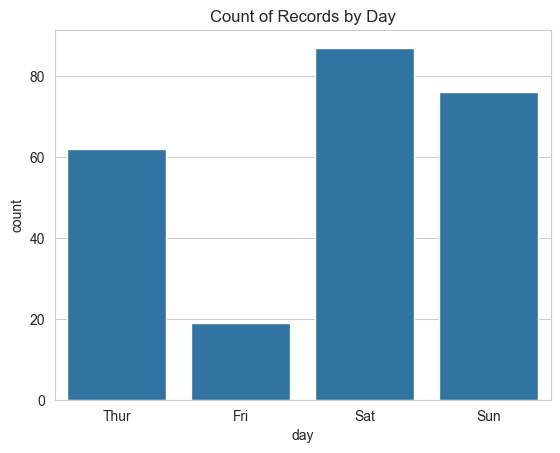

In [8]:
# count plot

sns.countplot(x='day', data=dataset)
plt.title('Count of Records by Day')
plt.show()


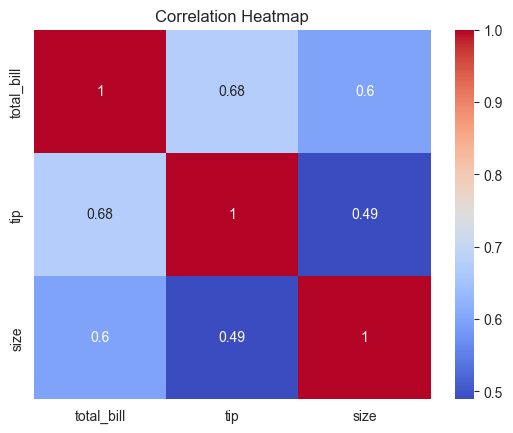

In [9]:
# heat map

# compute correlation only for numeric columns to avoid converting categorical values
corr = dataset.select_dtypes(include=['number']).corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


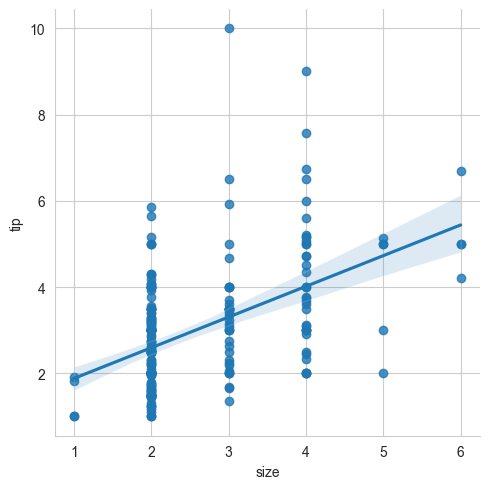

In [10]:
#  plot using discrete values

import seaborn as sns 
import matplotlib.pyplot as plt 
 
# load the dataset 
dataset = sns.load_dataset('tips') 
 
#  plot using discrete values
#print(dataset.head()) 
sns.set_style('whitegrid') 
sns.lmplot(x="size", y="tip", data=dataset)  
 
plt.show()

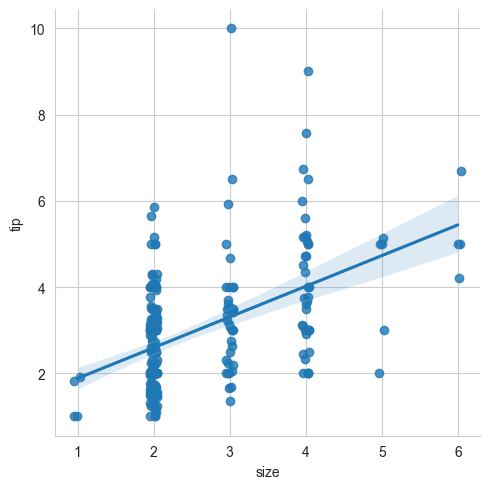

In [11]:
# plot with jitter for readability

# load the dataset 
dataset = sns.load_dataset('tips') 
 
# the for debugging 
#print(dataset.head()) 
sns.set_style('whitegrid') 
sns.lmplot(x="size", y="tip", data=dataset, x_jitter=.05)  
 
plt.show()

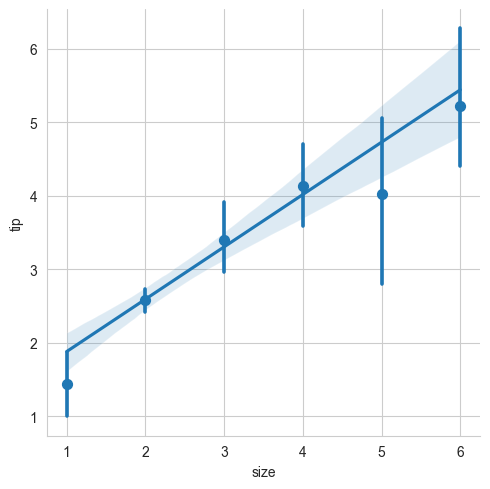

In [12]:
import numpy as np

# plot with estimator

# load the dataset 
dataset = sns.load_dataset('tips') 
 
# the for debugging 
#print(dataset.head()) 
sns.set_style('whitegrid') 
sns.lmplot(x="size", y="tip", data=dataset, x_estimator=np.mean) 
 
plt.show()

### Cybersecurity Labwork - Lab 07.02.01 - Regression Plots with Seaborn

In [13]:
# strip off the firsts and last characters
def parse_str(x): 
    return x[1:-1] 

In [14]:
from datetime import datetime

# read in date in format of log file

def parse_datetime(x): 
     
    dt = datetime.strptime(x[1:-1], '%d/%b/%Y:%H:%M:%S') 
    return dt 


In [15]:
# read log file into dataframe

['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'] 

['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent']

In [16]:
import pandas as pd

df = pd.read_csv(
    r'./data/access.log.csv',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',

    engine='python',
    na_values='-',
    header=None,
    usecols=[0, 3, 4, 5, 6, 7, 8],
    names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={
        'time': parse_datetime,
        'request': parse_str,
        'status': int,
        'size': int,
        'referer': parse_str,
        'user_agent': parse_str
    }
)


In [17]:
# install the Excel engine and import it (keep imports at top of cell)
%pip install openpyxl
import openpyxl
from pathlib import Path

excelFilename = './data/log.xlsx' 
# create target directory if it doesn't exist
Path(excelFilename).parent.mkdir(parents=True, exist_ok=True)

# specify engine to ensure pandas uses openpyxl
df.to_excel(excelFilename, index=False, sheet_name='data', engine='openpyxl')

Note: you may need to restart the kernel to use updated packages.


In [18]:
request = df.pop('request').str.split() 
df['resource'] = request.str[1] 
df['method'] = request.str[0] 
#yes I could have used regex for this  
# from the request get the string before the ? 
df['url'] = request.str[1].str.split('?').str[0]

In [20]:


dfbyhour=df.resample('H',on='time').sum() 

C:\Users\eCron\AppData\Local\Temp\ipykernel_11876\3773426480.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfbyhour=df.resample('H',on='time').sum()


In [21]:

# ensure the index is treated as datetime (avoids type-checker error and works at runtime)
dfbyhour['hour'] = pd.to_datetime(dfbyhour.index).hour
dfbyhour['date'] = pd.to_datetime(dfbyhour.index).date

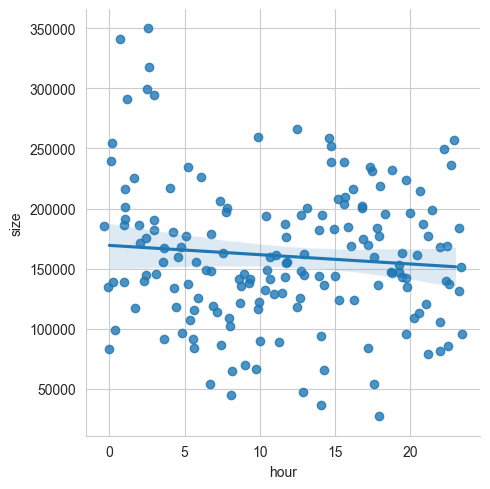

In [22]:
sns.lmplot(x="hour", y="size", order=1 ,data=dfbyhour, x_jitter=0.5) 

<Axes: xlabel='hour', ylabel='size'>

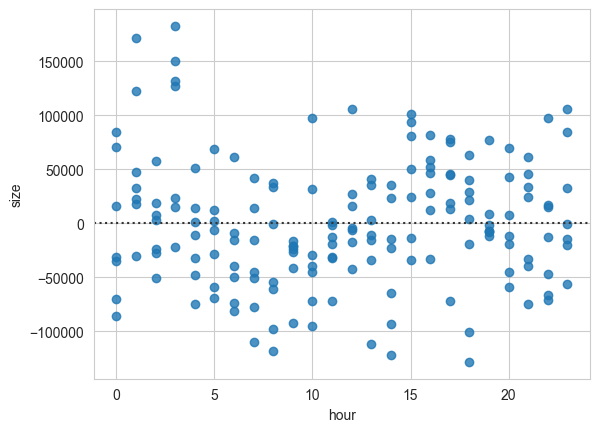

In [23]:
sns.residplot(x="hour", y="size", data=dfbyhour, order=1) 